In [1]:
# Wide display
from IPython.core.display import display, HTML
display(HTML("<style>#notebook-container { margin-left:-14px; width:calc(100% + 27px) !important; }</style>"))

In [120]:
import csv, json, os, numbers, pandas, re, scipy, scipy.sparse, shutil, StringIO
from matplotlib import pyplot
import subprocess, sys, threading, time, urllib2

def exec_ipynb(filename_or_url):
    nb = (urllib2.urlopen(filename_or_url) if re.match(r'https?:', filename_or_url) else open(filename_or_url)).read()
    jsonNb = json.loads(nb)
    #check for the modified formatting of Jupyter Notebook v4
    if(jsonNb['nbformat'] == 4):
        exec '\n'.join([''.join(cell['source']) for cell in jsonNb['cells'] if cell['cell_type'] == 'code']) in globals()
    else:
        exec '\n'.join([''.join(cell['input']) for cell in jsonNb['worksheets'][0]['cells'] if cell['cell_type'] == 'code']) in globals()

exec_ipynb('timelapse-utilities.ipynb')

In [4]:
import geopandas

#!conda install -y fiona geos psycopg2 pysal shapely 
#!conda install -y -c conda-forge geopandas

In [5]:
pandas.options.display.max_colwidth = 300

In [31]:
download_file('https://data.cmucreatelab.org/earthtime/us/districts_and_zips.geojson', 'data/districts_and_zips.geojson')

distzips = geopandas.GeoDataFrame.from_file('data/districts_and_zips.geojson')

distzips = distzips.to_crs(epsg=4326)

data/districts_and_zips.geojson already downloaded


In [84]:
distzips['distzip'] = [distzip['ZIP'] + 'MDJ-' + distzip['Magisteria'].split()[-1]  for index, distzip in distzips.iterrows()]

In [85]:
distzips

,Magisteria,ZIP,geometry,distzip
index_left,,,,
0,Magisterial District 05-3-02,15003,"(POLYGON ((-80.22363440639117 40.57592713797421, -80.2237760579409 40.57618674271584, -80.2237717099128 40.5761805327918, -80.2236339901756 40.5759281338432, -80.22363440639117 40.57592713797421)), POLYGON ((-80.22388552609208 40.57634308689938, -80.22394423489325 40.57642380334688, -80.22394601...",15003MDJ-05-3-02
1,Magisterial District 05-2-12,15005,"POLYGON ((-80.148476234629 40.67376851060921, -80.13186195080054 40.67363602630036, -80.13186194752785 40.67363602627427, -80.1328899456376 40.6723572584818, -80.132777305454 40.671087844565, -80.1328035734991 40.6710869967893, -80.1331187257055 40.6710757152425, -80.1331313629191 40.67107614202...",15005MDJ-05-2-12
2,Magisterial District 05-3-02,15005,"POLYGON ((-80.14330315598292 40.61478924223093, -80.13946710899448 40.61487033056763, -80.13952614263951 40.6148674943725, -80.13964055958979 40.6148619973917, -80.13999758993241 40.6148448442552, -80.14009167989001 40.6148403237617, -80.1407068265232 40.6148107697937, -80.1408078317349 40.61480...",15005MDJ-05-3-02
3,Magisterial District 05-3-04,15006,"POLYGON ((-79.87947895502103 40.6290363675701, -79.87947897512529 40.629036361273, -79.87957326397427 40.62938828195507, -79.8796837836414 40.6298007820234, -79.8800667879614 40.6301310278515, -79.88119593357531 40.62966993964754, -79.8811959560487 40.6296699304705, -79.88162546696046 40.6310581...",15006MDJ-05-3-04
4,Magisterial District 05-3-04,15007,"POLYGON ((-79.92363391662251 40.6538555945779, -79.923916819783 40.6538471721299, -79.9242524686309 40.6538376217109, -79.92424780153125 40.65352898963616, -79.9242380734336 40.6528845756664, -79.92422972190872 40.652331526374, -79.92421736025779 40.65188961352775, -79.9242150586999 40.651807183...",15007MDJ-05-3-04
5,Magisterial District 05-2-05,15014,"POLYGON ((-79.73987943552282 40.60108917548789, -79.74113573232739 40.6008013624821, -79.74120420449074 40.60078564431359, -79.74124668117869 40.6007759120037, -79.7427689618391 40.6020610738989, -79.7429015586295 40.6021777314114, -79.7433653486913 40.6025857656749, -79.7435203134927 40.6027157...",15014MDJ-05-2-05
6,Magisterial District 05-2-12,15015,"POLYGON ((-80.07129983859888 40.64435216028103, -80.0709037289932 40.6441767252367, -80.07090080326319 40.64411224938414, -80.0708981269869 40.6440530037233, -80.07089429850721 40.64396824662372, -80.07110044600419 40.6439628152273, -80.07130495208852 40.64396266807374, -80.0717665080394 40.6439...",15015MDJ-05-2-12
7,Magisterial District 05-2-20,15017,"(POLYGON ((-80.11634588227032 40.31268862395832, -80.11648335603002 40.31290288392824, -80.11654409592057 40.31304849346824, -80.11663989015661 40.31329580753182, -80.11671153525107 40.31348925594905, -80.11672804206201 40.3137095140496, -80.1167103102723 40.31390225044104, -80.11663957371763 40...",15017MDJ-05-2-20
8,Magisterial District 05-2-21,15017,"POLYGON ((-80.17086683336422 40.32903927497458, -80.17082247650571 40.3290687643806, -80.17078997087701 40.32909236831407, -80.1707483381208 40.3291225999031, -80.17059557553571 40.3292335260402, -80.17035203417572 40.3294035419584, -80.17027500259719 40.32946477629442, -80.1701598255879 40.3295...",15017MDJ-05-2-21


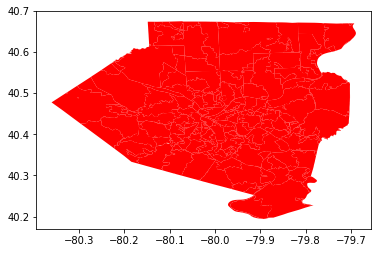

In [134]:
f, ax = pyplot.subplots(1)
# Plot polygons in light grey
distzips.plot(ax=ax, figsize=(40,40),color='red',linewidth=400)
# Overlay railway tunnels on top in strong green
distzips.loc[distzips['distzip']=='15005MDJ-05-3-02'].plot(figsize=(40,40),ax=ax,color='green',linewidth=40)
pyplot.show()

In [26]:
blocks = geopandas.GeoDataFrame.from_file('data/tl_2010_42003_tabblock10/tl_2010_42003_tabblock10.shp')

In [27]:
blocks = blocks.to_crs(epsg=4326)

In [36]:
blocks['geometry'] = blocks['geometry'].centroid

In [86]:
distzip_blocks = geopandas.sjoin(distzips, blocks, how="inner", op='intersects')

In [41]:
rentals = numpy.load('data/census2010_block2010.H0040004.numpy')
print 'rentals has', rentals.sum(), 'total units'

rentals has 40730218 total units


In [45]:
block_geoids_2010 = json.load(open('data/block_geoids_2010.json'))
print 'There are', len(block_geoids_2010), 'blocks'

assert(len(block_geoids_2010) + 1 == len(rentals))

There are 11078297 blocks


In [49]:
block_geoids_2010.index('420034470001027')

8120744

## Read eviction data from google sheet

In [76]:
csv_body = urllib2.urlopen('https://docs.google.com/spreadsheets/d/e/2PACX-1vSmDMACCNS_-2l6y04JkOnMd7RhCYpC6bzzGurXWAh-UMgtqG2EqW38w7bvzXt6fiOJnhpTNy15zl5q/pub?output=csv').read()

In [80]:
evictions = pandas.read_csv(StringIO.StringIO(csv_body))

In [102]:
evictions['distzip'] = evictions['Unnamed: 0']
evictions.head()

,Unnamed: 0,2008,2009,2010,2011,2012,2013,2014,2015,2016,distzip
0,15003MDJ-05-3-02,2,13,23,0,21,6,10,10,11,15003MDJ-05-3-02
1,15005MDJ-05-2-12,3,0,0,1,0,0,0,0,0,15005MDJ-05-2-12
2,15005MDJ-05-3-02,0,0,2,0,20,0,0,0,0,15005MDJ-05-3-02
3,15006MDJ-05-3-04,0,1,0,0,0,0,0,2,0,15006MDJ-05-3-04
4,15007MDJ-05-3-04,0,0,0,0,0,0,2,2,0,15007MDJ-05-3-04


## Interpolate from distzips to blocks

In [95]:
geoid10_to_index = {}
for i, geoid10 in enumerate(block_geoids_2010):
    geoid10_to_index[geoid10] = i + 1

In [135]:
type(rentals)

numpy.ndarray

In [152]:
for year in range(2008, 2017):
    block_evictions = numpy.zeros(len(block_geoids_2010), dtype=numpy.float32)
    all_eviction_count = 0
    uncounted_evictions = 0
    for index, distzip in distzips.iterrows():
        distzip_id = distzip['distzip']
        eviction_count = evictions.loc[evictions['distzip'] == distzip_id][str(year)].values
        if len(eviction_count) == 0:
            continue
        eviction_count = eviction_count[0]
        # Sum rental count across blocks
        rental_count = 0
        block_count = 0
        for index, distzip_block in distzip_blocks.loc[distzip_blocks['distzip'] == distzip_id].iterrows():
            block_count += 1
            rental_count += rentals[geoid10_to_index[distzip_block['GEOID10']]]

        if rental_count:
            # Interpolate evictions count across blocks
            for index, distzip_block in distzip_blocks.loc[distzip_blocks['distzip'] == distzip_id].iterrows():
                evictions_in_block = eviction_count * rentals[geoid10_to_index[distzip_block['GEOID10']]] / float(rental_count)
                block_evictions[geoid10_to_index[distzip_block['GEOID10']]] = evictions_in_block
        else:
            uncounted_evictions += eviction_count

        all_eviction_count += eviction_count
        #print '%4d %5d %4d %s' % (eviction_count, rental_count, block_count, distzip_id)

    dest = 'evictions-%d.float32' % year
    open(dest, 'w').write(block_evictions.tobytes())
    print 'Created %s' % dest
    print year, all_eviction_count, uncounted_evictions, block_evictions.sum()

Created evictions-2008.float32
2008 21091 568 20523.0
Created evictions-2009.float32
2009 28330 650 27680.0
Created evictions-2010.float32
2010 30255 635 29620.0
Created evictions-2011.float32
2011 30825 639 30186.0
Created evictions-2012.float32
2012 38696 162 38534.0
Created evictions-2013.float32
2013 40121 142 39979.0
Created evictions-2014.float32
2014 39584 151 39433.0
Created evictions-2015.float32
2015 38208 245 37963.0
Created evictions-2016.float32
2016 38127 100 38027.0


In [153]:
!ls -l evictions*float32

-rw-r--r--  1 rsargent  staff  44313188 Nov 18 13:36 evictions-2008.float32
-rw-r--r--  1 rsargent  staff  44313188 Nov 18 13:36 evictions-2009.float32
-rw-r--r--  1 rsargent  staff  44313188 Nov 18 13:36 evictions-2010.float32
-rw-r--r--  1 rsargent  staff  44313188 Nov 18 13:36 evictions-2011.float32
-rw-r--r--  1 rsargent  staff  44313188 Nov 18 13:36 evictions-2012.float32
-rw-r--r--  1 rsargent  staff  44313188 Nov 18 13:36 evictions-2013.float32
-rw-r--r--  1 rsargent  staff  44313188 Nov 18 13:37 evictions-2014.float32
-rw-r--r--  1 rsargent  staff  44313188 Nov 18 13:37 evictions-2015.float32
-rw-r--r--  1 rsargent  staff  44313188 Nov 18 13:37 evictions-2016.float32


In [154]:
!pwd

/Users/rsargent/projects/evictions


In [ ]:
# rsync -av /Users/rsargent/projects/evictions/evictions-*.float32 hal15:/home/rsargent/uwsgi/dotmaptiles/server/columncache/pa_allegheny_county_evictions

In [ ]:
    output_cols = {}
    missing_tracts = {}
    for state in state_names:
        data = read_acs2015_year_data(state, seq)
    
        logrecnos = data['LOGRECNO']

        logrecno_to_row = {}

        col_names = data.columns.values[6:]
        print '%s:%d has %d columns' % (state, seq, len(col_names))
        assert len(col_names) < 500   # sanity check to avoid demanding too much RAM on hal15

        for r, logrecno in enumerate(logrecnos):
            logrecno_to_row[logrecno] = r
    
        for col_name in col_names:
            input_col = data[col_name]
                
            if not col_name in output_cols:
                output_cols[col_name] = numpy.zeros(block_populations.size, dtype=numpy.float32)
            output_col = output_cols[col_name]

            for tract in sorted(tract_to_logrecno[state].keys()):
                input_pop = input_col[logrecno_to_row[tract_to_logrecno[state][tract]]]
                if not isinstance(input_pop, numbers.Number):
                    if input_pop == '.':
                        input_pop = 0
                    else:
                        try:
                            input_pop = float(input_pop)
                        except:
                            print 'That population is'
                            print input_pop
                            print type(input_pop)
                            print '>%s<' % input_pop
                            input_pop = 0
                            
                            
                if not tract in tract_block_indexes:
                    missing_tracts[tract] = True
                else:
                    for block_index in tract_block_indexes[tract]:
                        if block_populations[block_index]:
                            output_col[block_index] = input_pop * float(block_populations[block_index]) / tract_populations[tract]
  

## Download File Templates for 5-year data

In [4]:
#src = 'https://www2.census.gov/programs-surveys/acs/summary_file/2015/data/2015_1yr_Summary_FileTemplates.zip'
#dest = 'capture/ACS2015_1year/2015_1yr_Summary_FileTemplates.zip'
#download_file(src, dest)
#templates = unzip_file(dest)

def download_file_templates(year):
    src = 'https://www2.census.gov/programs-surveys/acs/summary_file/{year}/data/{year}_5yr_Summary_FileTemplates.zip'.format(**locals())

    # Special-case 2010
    src = src.replace('2010_5yr_Summary_File', '2010_5yr_SummaryFile')
    
    dest = 'capture/ACS{year}_5year/{year}_5yr_Summary_FileTemplates.zip'.format(**locals())
    download_file(src, dest)
    templates = unzip_file(dest)
    
for year in range(2009, 2016):
    download_file_templates(year)

capture/ACS2009_5year/2009_5yr_Summary_FileTemplates.zip already downloaded
capture/ACS2009_5year/2009_5yr_Summary_FileTemplates.zip already unzipped
capture/ACS2010_5year/2010_5yr_Summary_FileTemplates.zip already downloaded
capture/ACS2010_5year/2010_5yr_Summary_FileTemplates.zip already unzipped
capture/ACS2011_5year/2011_5yr_Summary_FileTemplates.zip already downloaded
capture/ACS2011_5year/2011_5yr_Summary_FileTemplates.zip already unzipped
capture/ACS2012_5year/2012_5yr_Summary_FileTemplates.zip already downloaded
capture/ACS2012_5year/2012_5yr_Summary_FileTemplates.zip already unzipped
capture/ACS2013_5year/2013_5yr_Summary_FileTemplates.zip already downloaded
capture/ACS2013_5year/2013_5yr_Summary_FileTemplates.zip already unzipped
capture/ACS2014_5year/2014_5yr_Summary_FileTemplates.zip already downloaded
capture/ACS2014_5year/2014_5yr_Summary_FileTemplates.zip already unzipped
capture/ACS2015_5year/2015_5yr_Summary_FileTemplates.zip already downloaded
capture/ACS2015_5year/20

In [5]:
!ls -l capture/ACS2015_1year/2015_1yr_Summary_FileTemplates/Templates | head

total 13192
-rw-rw-r-- 1 rsargent rsargent  25600 Aug  5  2016 2015_SFGeoFileTemplate.xls
-rw-rw-r-- 1 rsargent rsargent  92160 Aug  5  2016 Seq100.xls
-rw-rw-r-- 1 rsargent rsargent  60928 Aug  5  2016 Seq101.xls
-rw-rw-r-- 1 rsargent rsargent  88064 Aug  5  2016 Seq102.xls
-rw-rw-r-- 1 rsargent rsargent 115200 Aug  5  2016 Seq103.xls
-rw-rw-r-- 1 rsargent rsargent  99328 Aug  5  2016 Seq104.xls
-rw-rw-r-- 1 rsargent rsargent 111104 Aug  5  2016 Seq105.xls
-rw-rw-r-- 1 rsargent rsargent 107520 Aug  5  2016 Seq106.xls
-rw-rw-r-- 1 rsargent rsargent  88064 Aug  5  2016 Seq107.xls
ls: write error: Broken pipe


## Download ACS2015 5-year data (tract and block group)

In [13]:
def download_data(year):
    filename = 'Tracts_Block_Groups_Only'
    if year < 2011:
        filename += '.zip'
    else:
        filename += '.tar.gz'
    src = 'https://www2.census.gov/programs-surveys/acs/summary_file/{year}/data/5_year_entire_sf/{filename}'.format(**locals())
    dest = 'capture/ACS{year}_5year/{filename}'.format(**locals())

    if os.path.exists(dest):
        print '{dest} already exists, skipping'.format(**locals())
    else:
        try:
            os.unlink(filename)
        except OSError:
            pass
        cmd = 'curl'
        cmd += " -H 'User-Agent:Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/61.0.3163.100 Safari/537.36'"
        cmd += ' {src}'.format(**locals())
        cmd += ' >{dest}'.format(**locals())
        try:
            os.makedirs(os.path.dirname(dest))
        except OSError:
            pass
        print cmd
        subprocess_check(cmd)
        print 'Downloaded to {dest}'.format(**locals())

for year in range(2009, 2016):
    download_data(year)

capture/ACS2009_5year/Tracts_Block_Groups_Only.zip already exists, skipping
capture/ACS2010_5year/Tracts_Block_Groups_Only.zip already exists, skipping
capture/ACS2011_5year/Tracts_Block_Groups_Only.tar.gz already exists, skipping
capture/ACS2012_5year/Tracts_Block_Groups_Only.tar.gz already exists, skipping
capture/ACS2013_5year/Tracts_Block_Groups_Only.tar.gz already exists, skipping
capture/ACS2014_5year/Tracts_Block_Groups_Only.tar.gz already exists, skipping
capture/ACS2015_5year/Tracts_Block_Groups_Only.tar.gz already exists, skipping


In [12]:
!ls -l capture/ACS*/Tracts*

-rw-rw-r-- 1 rsargent rsargent 2806502508 Oct  5 07:52 capture/ACS2009_5year/Tracts_Block_Groups_Only.zip
-rw-rw-r-- 1 rsargent rsargent 3369803296 Oct  5 07:59 capture/ACS2010_5year/Tracts_Block_Groups_Only.zip
-rw-rw-r-- 1 rsargent rsargent  749940736 Oct  5 08:02 capture/ACS2011_5year/Tracts_Block_Groups_Only.tar.gz
-rw-rw-r-- 1 rsargent rsargent 3651813394 Oct  5 07:33 capture/ACS2012_5year/Tracts_Block_Groups_Only.tar.gz
-rw-rw-r-- 1 rsargent rsargent 3769295680 Oct  5 07:45 capture/ACS2013_5year/Tracts_Block_Groups_Only.tar.gz
-rw-rw-r-- 1 rsargent rsargent 3757945352 Oct  5 07:59 capture/ACS2014_5year/Tracts_Block_Groups_Only.tar.gz
-rw-rw-r-- 1 rsargent rsargent 3747109902 Dec  2  2016 capture/ACS2015_5year/Tracts_Block_Groups_Only.tar.gz


In [ ]:
    
    
!mkdir -p capture/ACS2005_5year
!mv  capture/ACS2005_5year

!cd capture/ACS2005_5year; tar xvfz Tracts_Block_Groups_Only.tar.gz >/dev/null

!wget --header="User-Agent: Mozilla/5.0 (Windows NT 6.0) AppleWebKit/537.11 (KHTML, like Gecko) Chrome/23.0.1271.97 Safari/537.11" https://www2.census.gov/programs-surveys/acs/summary_file/2015/data/5_year_entire_sf/2015_ACS_Geography_Files.zip

!mv 2015_ACS_Geography_Files.zip capture/ACS2005_5year

unzip_file('capture/ACS2005_5year/2015_ACS_Geography_Files.zip')

## Read CSV utility functions

In [ ]:
def read_acs2015_5year_template(seqno):
    path = 'capture/ACS2015_5year/2015_5yr_Summary_FileTemplates/2015_5yr_Templates/Seq%d.xls' % seqno
    if not os.path.exists(path):
        return None
    return pandas.read_excel(path)

# Combine template header and data into pandas frame
def read_acs2015_year_data(state, seqno):
    header = read_acs2015_5year_template(seqno)
    data = pandas.read_csv('capture/ACS2015_5year/group2/e20155%s%04d000.txt' % (state, seqno),
                            index_col=False,
                            dtype={'FILEID':numpy.str,
                                   'FILETYPE':numpy.str,
                                   'STUSAB':numpy.str,
                                   'CHARITER':numpy.str,
                                   'SEQUENCE':numpy.str,
                                   'LOGRECNO':numpy.str},
                            header=None,
                            names=header.columns.values)
    return data

In [ ]:
dataset = 'acs2015_5year_tract2010'
column_dir = 'columncache'

## Write ACS2015 5-year description.html

In [ ]:
description_path = column_dir + '/' + dataset + '/description.html'
force_regenerate = True

if os.path.exists(description_path) and not force_regenerate:
    print '{description_path} already exists, skipping'.format(**locals())
else:
    table_rows = []

    for seqno in range(1, 1000):
        template = read_acs2015_5year_template(seqno)
        if template is None:
            break
        for col in range(6, template.shape[1]):
            colname = template.columns.values[col]
            description = template.iloc[0,col]
            description = description.replace(':', '')
            description = re.sub(r'\s*%\s*', ' &mdash; ', description)
            table_rows.append(u'<tr><td>{dataset}.{colname}</td><td>{description}</td></tr>\n'.format(**locals()))

    html = '<table>' + ''.join(table_rows) + '</table>'

    open(description_path, 'w').write(html.encode('utf8'))
    print 'Wrote %d column names and descriptions to %s' % (len(table_rows), description_path)

## Create ACS2015 block-level population

### Read 2010 block geoids and 2010 block populations

In [ ]:
block_populations = numpy.load('columncache/census2010_block2010/p001001.numpy')
print 'block_populations has', sum(block_populations), 'total people'

In [ ]:
# block_geoids_2010 = [row[0] for row in query_psql("SELECT geoid2010 FROM sf1_2010_block_p001 order by blockidx2010")]
block_geoids_2010 = json.load(open('block_geoids_2010.json'))
print 'There are', len(block_geoids_2010), 'blocks'

assert(len(block_geoids_2010) + 1 == len(block_populations))

### Compute 2010 population by tract and block indices from tract


In [ ]:
tract_populations = {}
tract_block_indexes = {}

for block_index_minus_one, block_geoid in enumerate(block_geoids_2010):
    block_index = block_index_minus_one + 1
    tract_name = block_geoid[0:11]
    if tract_name not in tract_populations:
        tract_populations[tract_name] = 0
        tract_block_indexes[tract_name] = []
    tract_populations[tract_name] += block_populations[block_index]
    tract_block_indexes[tract_name].append(block_index)

print 'There are', len(tract_populations), 'tracts'
print 'tract_populations has', sum(tract_populations.values()), 'people'

### Map tract identifiers to LOGRECNO using geography file

In [ ]:
tract_to_logrecno = {}

def compute_tract_to_logrecno(state):
    geography = pandas.read_csv('capture/ACS2015_5year/2015_ACS_Geography_Files/g20155{state}.csv'.format(**locals()),
                                dtype=numpy.str,
                                index_col=False,
                                header=None,
                                keep_default_na=False,
                                na_values=[])

    nrows = geography.shape[0]
    print 'State {state} has {nrows} geography rows'.format(**locals())
    
    ntracts = 0
    tract_to_logrecno[state] = {}
    
    for r in range(0, geography.shape[0]):
        aggregation_level = geography.iloc[r, 2]
        if aggregation_level == '140': # census tract
            tract_identifier = geography.iloc[r, 48][7:]
            logrecno = geography.iloc[r, 4]
            tract_to_logrecno[state][tract_identifier] = logrecno
    
    print 'Found %d tracts for state %s' % (len(tract_to_logrecno[state]), state)

for state in state_names:
    compute_tract_to_logrecno(state)

### Interpolate and write columns for data file

In [ ]:
# TODO: can we do this with a data frame then write out columns?

def interpolate_acs_file(state, seq):
    print 'Reading %s:%d' % (state, seq)
    data = read_acs2015_year_data(state, seq)

    print 'Mapping locrecno to row'
    logrecnos = data['LOGRECNO']

    logrecno_to_row = {}

    for r, logrecno in enumerate(logrecnos):
        logrecno_to_row[logrecno] = r
    
    col_names = data.columns.values[6:]
    print 'Iterating across %d columns' % len(col_names)
    for col_name in col_names:
        input_col = data[col_name]
        output_col_path = column_dir + '/' + dataset + '/' + col_name + '.float32'
        if os.path.exists(output_col_path):
            print '%s already exists, skipping' % output_col_path
            continue

        output_col = numpy.zeros(block_populations.size, dtype=numpy.float32)

        for tract in sorted(tract_to_logrecno[state].keys()):
            input_pop = input_col[logrecno_to_row[tract_to_logrecno[state][tract]]]
            if not isinstance(input_pop, numbers.Number):
                if input_pop == '.':
                    input_pop = 0
                else:
                    try:
                        input_pop = float(input_pop)
                    except:
                        print 'That population is'
                        print input_pop
                        print type(input_pop)
                        print '>%s<' % input_pop
                        input_pop = 0
            if not tract in tract_block_indexes:
                print 'missing tract {tract} from tract_block_indexes'.format(**locals())
            else:
                for block_index in tract_block_indexes[tract]:
                    if block_populations[block_index]:
                        output_col[block_index] = input_pop * float(block_populations[block_index]) / tract_populations[tract]
            
        output_col.tofile(output_col_path + '.tmp')
        os.rename(output_col_path + '.tmp', output_col_path)
        print 'Created %s' % output_col_path

for seq in range(97, 2000):
    interpolate_acs_file('pa', seq)

In [ ]:
# TODO: can we do this with a data frame then write out columns?

def interpolate_acs_file(seq):
    output_cols = {}
    missing_tracts = {}
    for state in state_names:
        data = read_acs2015_year_data(state, seq)
    
        logrecnos = data['LOGRECNO']

        logrecno_to_row = {}

        col_names = data.columns.values[6:]
        print '%s:%d has %d columns' % (state, seq, len(col_names))
        assert len(col_names) < 500   # sanity check to avoid demanding too much RAM on hal15

        for r, logrecno in enumerate(logrecnos):
            logrecno_to_row[logrecno] = r
    
        for col_name in col_names:
            input_col = data[col_name]
                
            if not col_name in output_cols:
                output_cols[col_name] = numpy.zeros(block_populations.size, dtype=numpy.float32)
            output_col = output_cols[col_name]

            for tract in sorted(tract_to_logrecno[state].keys()):
                input_pop = input_col[logrecno_to_row[tract_to_logrecno[state][tract]]]
                if not isinstance(input_pop, numbers.Number):
                    if input_pop == '.':
                        input_pop = 0
                    else:
                        try:
                            input_pop = float(input_pop)
                        except:
                            print 'That population is'
                            print input_pop
                            print type(input_pop)
                            print '>%s<' % input_pop
                            input_pop = 0
                            
                            
                if not tract in tract_block_indexes:
                    missing_tracts[tract] = True
                else:
                    for block_index in tract_block_indexes[tract]:
                        if block_populations[block_index]:
                            output_col[block_index] = input_pop * float(block_populations[block_index]) / tract_populations[tract]
            
    print 'Missing tracts: %s' % (sorted(missing_tracts.keys()))

    for col_name in sorted(output_cols.keys()):
        output_col_path = column_dir + '/' + dataset + '/' + col_name + '.float32'
        output_cols[col_name].tofile(output_col_path + '.tmp')
        os.rename(output_col_path + '.tmp', output_col_path)
        print 'Created %s with sum %f' % (output_col_path, output_cols[col_name].sum())
    
        
for seq in range(1, 1000):
    interpolate_acs_file(seq)

In [ ]:
len(tract_block_indexes.keys())

In [ ]:
!ls -l columncache/acs2015_5year_tract2010/B08006_002.float32

In [ ]:
x=numpy.memmap('columncache/acs2015_5year_tract2010/B08006_002.float32', dtype=numpy.float32, mode='r')

In [ ]:
x.sum()